In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode
from IPython.display import display
from datetime import datetime
import warnings

In [6]:

def get_riders(teamcode):
    url = f'https://www.procyclingstats.com/team/{teamcode}-{datetime.now().strftime("%Y")}' 
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    # Trouvez le tableau contenant les données des coureurs
    table = soup.find('table')
    rows = table.find_all('tr')
    # Liste pour stocker les données
    data = []
    # Parcourir les lignes du tableau
    for row in rows[1:]:  # Ignorer la première ligne contenant les en-têtes de colonnes
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)
    # Créer un dataframe à partir des données
    riders_df = pd.DataFrame(data, columns=['#', 'ridername', 'nationality', 'points'])
    def extract_name(full_name):
        # Initialiser le nom et le prénom
        first_name = ""
        last_name = ""
        # Parcourir les caractères dans le nom complet
        for char in full_name:
            if char.islower():
                # Trouver la première minuscule, à partir de là, c'est le prénom
                index_prenom = full_name.index(char) - 1
                first_name = full_name[index_prenom:]
                last_name = full_name[:index_prenom]
                break
        return first_name.strip(), last_name.strip()
    # Appliquer la fonction pour créer les colonnes 'firstname' et 'lastname'
    riders_df['firstname'], riders_df['lastname'] = zip(*riders_df['ridername'].apply(lambda x: extract_name(x)))
    riders_df["ridername"] = riders_df.apply(lambda row: row['firstname'] + ' ' + row['lastname'], axis=1)  # Inversion
    riders_df['ridercode'] = riders_df['ridername'].apply(lambda x: unidecode(x).replace("'", " ").replace(' ', '-').lower())
    return riders_df[["ridername", "ridercode"]]


def get_uci_points(rider):
    url = f'https://www.procyclingstats.com/rider/{rider}/{datetime.now().strftime("%Y")}' 
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        uci_div = soup.find('div', class_='rdrSeasonSum')
        
        if uci_div:
            uci_text = uci_div.text
            index_uci = uci_text.find('UCI')
            if index_uci != -1:
                uci_points = ''
                for char in uci_text[index_uci + 3:]:
                    if char.isdigit():
                        uci_points += char
                    elif uci_points:
                        break
                return int(uci_points) if uci_points else None
    return None

def get_days(rider):
    url = f'https://www.procyclingstats.com/rider/{rider}/{datetime.now().strftime("%Y")}' 
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        div = soup.find('div', class_='rdrSeasonSum')
        
        if div:
            text = div.text
            index_days = text.find('days')
            if index_days != -1:
                days = ''
                for char in text[index_days - 6:]:
                    if char.isdigit():
                        days += char
                    elif days:
                        break
                return int(days) if days else None
    return None

def get_age(rider):
    url = f'https://www.procyclingstats.com/rider/{rider}/{datetime.now().strftime("%Y")}' 
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        div = soup.find('div', class_='rdr-info-cont')
        
        if div:
            text = div.text
            index_age = text.find('(')
            if index_age != -1:
                age = ''
                for char in text[index_age:]:
                    if char.isdigit():
                        age += char
                    elif age:
                        break
                return int(age) if age else None
    return None

def get_weight(rider):
    url = f'https://www.procyclingstats.com/rider/{rider}/{datetime.now().strftime("%Y")}' 
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        div = soup.find('div', class_='rdr-info-cont')
        
        if div:
            text = div.text
            index_w = text.find('Weight')
            if index_w != -1:
                w = ''
                for char in text[index_w:]:
                    if char.isdigit():
                        w += char
                    elif w:
                        break
                return int(w) if w else None
    return None

def get_height(rider):
    url = f'https://www.procyclingstats.com/rider/{rider}/{datetime.now().strftime("%Y")}' 
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        div = soup.find('div', class_='rdr-info-cont')
        
        if div:
            text = div.text
            index_h = text.find('Height')
            if index_h != -1:
                h = ''
                for char in text[index_h:]:
                    if char.isdigit() or char == ".":
                        h += char
                    elif h:
                        break
                return float(h) if h else None
    return None

def tableau_UCI(coureurs):
    df = pd.DataFrame()
    for i, rider in enumerate(coureurs["ridercode"]):
        data = {"Rider": coureurs["ridername"][i], "UCI Pts": get_uci_points(rider)}
        df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
    df.fillna(0, inplace = True)
    df = df.sort_values(by = "UCI Pts", ascending= False).reset_index(drop=False)
    df["index"] = np.arange(df.shape[0]) + 1
    df.rename(columns={"index":"#"}, inplace= True)
    return df

def tableau_infos(coureurs):
    df = pd.DataFrame()
    for i, rider in enumerate(coureurs["ridercode"]):
        data = {"Rider": coureurs["ridername"][i], "UCI Pts": get_uci_points(rider), "Racedays": get_days(rider), "Age": get_age(rider), "Weight": get_weight(rider), "Height": get_height(rider)}
        df = df.append(data, ignore_index=True)
    df.fillna(0, inplace = True)
    df = df.sort_values(by = "UCI Pts", ascending= False).reset_index(drop=False)
    df["index"] = np.arange(df.shape[0]) + 1
    df.rename(columns={"index":"#"}, inplace= True)
    return df

def plot_uci(df, teamname = ""):
    data = df.copy()[0:20].sort_values(by= "UCI Pts", ascending= True)
    plt.figure(figsize=(10, 7))
    bars = plt.barh(data["Rider"], data["UCI Pts"], color = "mediumblue")
    for bar in bars:        #ajout des % en etiquette
        width = bar.get_width()
        if (width >= 10):
            plt.text(width,
                bar.get_y() + bar.get_height() / 2,
                f'{width:.0f} pts',
                ha='right', 
                va='center',
                c="white",
                fontsize = 8,
                fontweight = 'bold')
    plt.text(width*0.9, 0, f'Total : {data.loc[:, "UCI Pts"].sum()} pts', va = "bottom", fontsize = 12)        
    plt.xlabel("UCI Pts")
    plt.yticks(fontsize=9)
    plt.grid(axis="x", linestyle=':')
    plt.title(f"UCI Breakdown for {teamname} - " + datetime.now().strftime("%d-%m-%Y"), fontweight = 'bold')
    plt.show()

def plot_compare_uci(teamcode1, teamcode2):  
    warnings.filterwarnings("ignore")
    df1 = main_uci(teamcode1, to_plot=False)
    df2 = main_uci(teamcode2, to_plot=False)
    df1 = df1.copy()[0:20].sort_values(by= "UCI Pts", ascending= True)
    df2 = df2.copy()[0:20].sort_values(by= "UCI Pts", ascending= True)
    dfs = [df1, df2]


    plt.figure(figsize=(10, 7))
    for df in dfs:
        bars = plt.barh(df["Rider"], df["UCI Pts"], color = "mediumblue")
        for bar in bars:        #ajout des % en etiquette
            width = bar.get_width()
            if (width >= 30):
                plt.text(width,
                    bar.get_y() + bar.get_height() / 2,
                    f'{width:.0f}',
                    ha='right', 
                    va='center',
                    c="white",
                    fontsize = 10,
                    fontweight = 'bold')
    plt.text(width*0.9, 0, f'Total : {df1.loc[:, "UCI Pts"].sum()} pts', va = "bottom", fontsize = 12)  
    plt.text(width*0.9, 22, f'Total : {df2.loc[:, "UCI Pts"].sum()} pts', va = "bottom", fontsize = 12)      
    plt.xlabel("UCI Pts")
    plt.yticks(fontsize=9)
    plt.grid(axis="x", linestyle=':')
    plt.title(f"UCI Breakdown {teamcode2} VS {teamcode1} - " + datetime.now().strftime("%d-%m-%Y"), fontweight = 'bold')
    plt.show()

def main_uci(teamcode, teamname = None, to_plot = True):
    '''
    UCI Points Breakdown for the selected team.
    
    Parameters:
    ----------
    teamcode : str
        String to use in the URL (e.g., "alpecin-deceuninck").
    
    teamname : str, optional
        Name of the team to display in the outputs. If not provided, defaults to the `teamcode`.
    
    to_plot : bool, optional
        If True, a plot will be displayed. Otherwise, a table will be shown. Defaults to True.
    
    Available team codes:
    ---------------------
        'alpecin-deceuninck': 'Alpecin-Deceuninck',
        'arkea-b-b-hotels': 'Arkéa - B&B Hôtels',
        'bahrain-victorious': 'Bahrain-Victorious',
        'cofidis': 'Cofidis',
        'decathlon-ag2r-la-mondiale': 'Décathlon-AG2R',
        'ef-education-easypost': 'EF Education-Easypost',
        'groupama-fdj': 'Groupama-FDJ',
        'ineos-grenadiers': 'Ineos Grenadiers',
        'intermarche-wanty': 'Intermarché-Wanty',
        'lidl-trek': 'Lidl-Trek',
        'movistar-team': 'Movistar',
        'red-bull-bora-hansgrohe': 'Red Bull - Bora - Hansgrohe',
        'soudal-quick-step': 'Soudal-QuickStep',
        'team-picnic-postnl': 'Team Picnic PostNL',
        'team-jayco-alula': 'Team Jayco-AlUla',
        'team-visma-lease-a-bike': 'Visma Lease-a-Bike',
        'uae-team-emirates-xrg': 'UAE Team Emirates',
        'xds-astana-team': 'XDS Astana Team',
        'lotto': 'Lotto',
        'israel-premier-tech': 'Israel-Premier Tech',
        'uno-x-mobility': 'Uno-X',
        'team-totalenergies': 'TotalEnergies',
        'tudor-pro-cycling-team': 'Tudor Pro Cycling Team'
    '''
    if teamname is None:
        teamname = teamcode
    coureurs = get_riders(teamcode)
    # Dictionnaire des remplacements
    remplacements = {
        "romain-gregoire": "romain-gregoire1",
        "mattias-skjelmose": "mattias-skjelmose-jensen",
        "igor-arrieta": "igor-arrieta-lizarraga",
        "juan-ayuso": "juan-ayuso-pesquera",
        "OßSCHARTNER Felix GR": "GROSSSCHARTNER Felix",
        "ossschartner-felix-gr": "felix-grossschartner",
        "magnus-cort": "magnus-cort-nielsen",
        "carlos-rodriguez": "carlos-rodriguez-cano",
        "brandon-smith-rivera": "brandon-smith-rivera-vargas",
        "santiago-buitrago": "santiago-buitrago-sanchez",
        "fred-wright": "alfred-wright",
        "jesus-herrada": "jesus-herrada-lopez"
    }
    for ancien, nouveau in remplacements.items():
        coureurs.replace(ancien, nouveau, inplace=True)

    df = tableau_UCI(coureurs)
    if to_plot:
        plot_uci(df, teamname)
    return df


def classement_UCI_equipes():
    '''
    Calculates and displays the UCI Ranking by teams, including the 22 best teams
    '''
    team_mapping = {
        'alpecin-deceuninck': 'Alpecin-Deceuninck',
        'arkea-b-b-hotels': 'Arkéa - B&B Hôtels',
        'bahrain-victorious': 'Bahrain-Victorious',
        'cofidis': 'Cofidis',
        'decathlon-ag2r-la-mondiale': 'Décathlon-AG2R',
        'ef-education-easypost': 'EF Education-Easypost',
        'groupama-fdj': 'Groupama-FDJ',
        'ineos-grenadiers': 'Ineos Grenadiers',
        'intermarche-wanty': 'Intermarché-Wanty',
        'lidl-trek': 'Lidl-Trek',
        'movistar-team': 'Movistar',
        'red-bull-bora-hansgrohe': 'Red Bull - Bora - Hansgrohe',
        'soudal-quick-step': 'Soudal-QuickStep',
        'team-picnic-postnl': 'Team Picnic PostNL',
        'team-jayco-alula': 'Team Jayco-AlUla',
        'team-visma-lease-a-bike': 'Visma Lease-a-Bike',
        'uae-team-emirates-xrg': 'UAE Team Emirates',
        'xds-astana-team': 'XDS Astana Team',
        'lotto': 'Lotto',
        'israel-premier-tech': 'Israel-Premier Tech',
        'uno-x-mobility': 'Uno-X',
        'team-totalenergies': 'TotalEnergies',
        'tudor-pro-cycling-team': 'Tudor Pro Cycling Team'
    }
    final_df = pd.DataFrame({"Team": [team_mapping[team] for team in team_mapping]})
    teams_totals = []
    for team in team_mapping:  # boucle equipes
        team_df = main_uci(team, to_plot=False)
        # display(team_df)
        team_df = team_df[0:20]
        team_total = np.sum(team_df["UCI Pts"])
        teams_totals.append(team_total)
    final_df["UCI Pts"] = pd.Series(teams_totals)  
    final_df = final_df.sort_values(by = "UCI Pts", ascending=False).reset_index(drop=False)
    final_df["index"] = np.arange(final_df.shape[0]) + 1
    final_df.rename(columns={"index":"#"}, inplace=True)
    display(final_df)
    data = final_df.sort_values(by = "UCI Pts", ascending=True)
    today = datetime.now().strftime("%d-%m-%Y")
    # PLOT
    plt.figure(figsize=(10, 7))
    bars = plt.barh(data["Team"], data["UCI Pts"], color = "teal")
    for bar in bars:        #ajout des % en etiquette
        width = bar.get_width()
        if (width >= 20):
            plt.text(width,
                bar.get_y() + bar.get_height() / 2,
                f'{width:.0f} pts',
                ha='right', 
                va='center',
                c="white",
                fontsize = 8,
                fontweight = 'bold')
    plt.xlabel("UCI Pts")
    plt.yticks(fontsize=9)
    plt.grid(axis="x", linestyle=':')
    plt.title(f"UCI Ranking 2025 - {today}", fontweight = 'bold')
    plt.show()
    
# config
plt.rcParams["font.family"] = "Garamond"
warnings.filterwarnings("ignore")

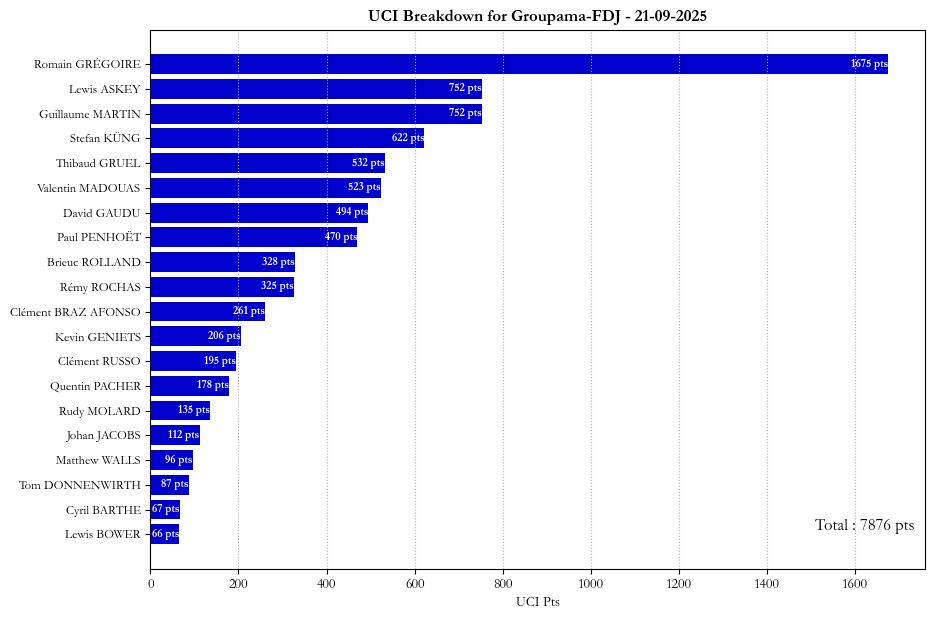

,#,Rider,UCI Pts
0,1,Romain GRÉGOIRE,1675
1,2,Guillaume MARTIN,752
2,3,Lewis ASKEY,752
3,4,Stefan KÜNG,622
4,5,Thibaud GRUEL,532
5,6,Valentin MADOUAS,523
6,7,David GAUDU,494
7,8,Paul PENHOËT,470
8,9,Brieuc ROLLAND,328
9,10,Rémy ROCHAS,325


In [3]:
main_uci("groupama-fdj", "Groupama-FDJ")

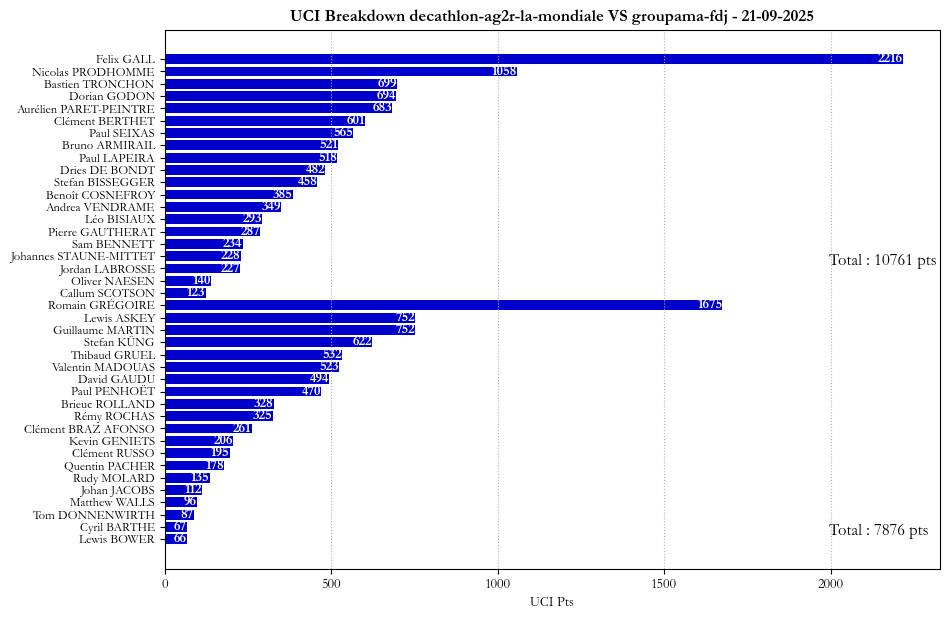

In [4]:
plot_compare_uci("groupama-fdj", "decathlon-ag2r-la-mondiale")

In [7]:
classement_UCI_equipes()

ConnectionError: HTTPSConnectionPool(host='www.procyclingstats.com', port=443): Max retries exceeded with url: /rider/aurelien-paret-peintre/2025 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000026F7AEBEB50>: Failed to establish a new connection: [WinError 10065] Une opération a été tentée sur un hôte impossible à atteindre'))